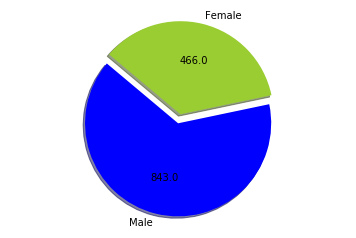

In [2]:
#Task 1
# Question 1
# This assignment is for visualization using matplotlib:
# data to use:
# url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
# titanic = pd.read_csv(url)
# Charts to plot:
# 1. Create a pie chart presenting the male/female proportion



import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
data.head(5)


explode = (0.1, 0)
labels = ['Male', 'Female']
colors = ['blue', 'yellowgreen']
sizes = data.sex.value_counts()

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

plt.pie(data.sex.value_counts(),shadow=True, explode=explode, labels=labels, colors=colors,
        autopct=absolute_value, startangle=140)

plt.title="Male / Female Proportion"
# plt.title("MALE AND FEMALE PROPORTION")
plt.axis('equal')
plt.show()



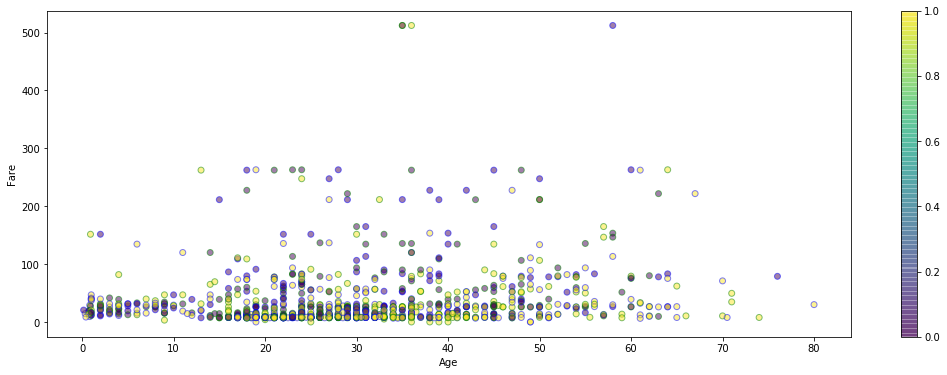

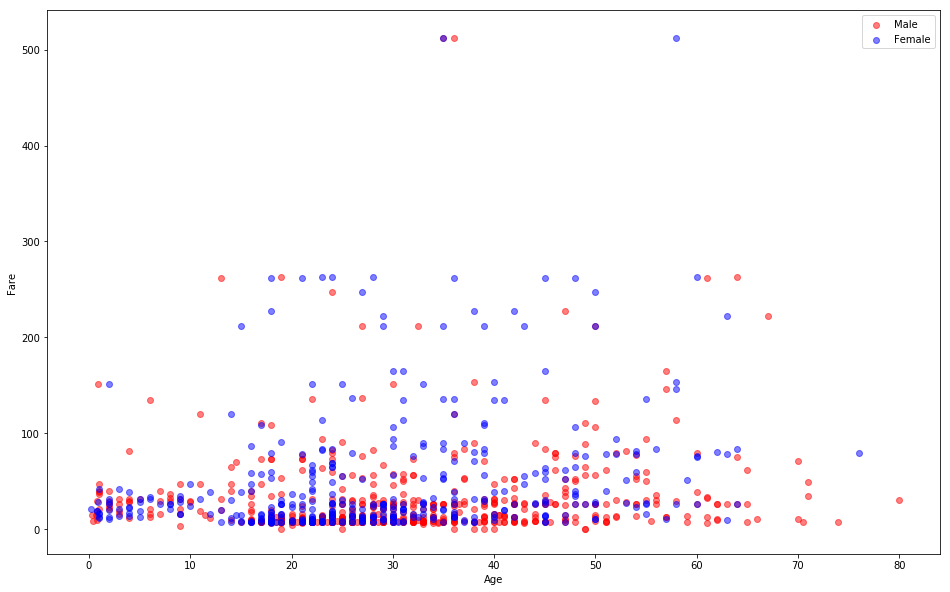

In [11]:
# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

#Method 1
colors = ['blue', 'green']
fig = plt.figure(figsize=(18,6))
plt.scatter(data['age'], data['fare'],alpha=0.5, c=pd.factorize(data['sex'])[0],edgecolors=colors)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar()
plt.show()

# Method 2
colors = ['blue', 'green']
fig = plt.figure(figsize=(16,10))
plt.scatter(data[data['sex'] == 'male']['age'], data[data['sex'] == 'male']['fare'],alpha=0.5, color="r", label="Male")
plt.scatter(data[data['sex'] == 'female']['age'], data[data['sex'] == 'female']['fare'],alpha=0.5,color="b", label="Female")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()


In [5]:
# Task 2: 
#     It happens all the time: someone gives you data containing malformed strings, Python, lists and
# missing data. How do you tidy it up so you can get on with the analysis?
# Take this monstrosity as the DataFrame to use in the following puzzles:
# df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
# 'Budapest_PaRis', 'Brussels_londOn'],
# 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
# 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
# 'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

# Question 1. Some values in the the FlightNumber column are missing. These numbers are meant to
# increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
# numbers and make the column an integer column (instead of a float column).

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'], 
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 
                   'Airline': ['KLM(!)', ' (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

# print(df)

df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df.interpolate

<bound method NDFrame.interpolate of             From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris         10045      [23, 47]               KLM(!)
1      MAdrid_miLAN         10055            []                 (12)
2  londON_StockhOlm         10065  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis         10075          [13]       12. Air France
4   Brussels_londOn         10085      [67, 32]          "Swiss Air">

In [6]:
# Question 2. The From_To column would be better as two separate columns! Split each string on the
# underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
# correct column names to this temporary DataFrame.

# new = df["From_To"].str.split("_",expand=True,) 
dftempfromto=df.From_To.str.split("_",expand=True)
dftempfromto


,0,1
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [7]:
# Question 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
# Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
# "London".)

dftempfromto[0].str.capitalize()
dftempfromto[1].str.capitalize()

0        Paris
1        Milan
2    Stockholm
3        Paris
4       London
Name: 1, dtype: object

In [8]:
# Question 4. Delete the From_To column from df and attach the temporary DataFrame from the previous
# questions.

# df.drop(df.columns[[2]],axis=1, inplace = True) 
df['From'] = dftempfromto[0].str.capitalize()
df['To'] = dftempfromto[1].str.capitalize()
df.drop(['From_To'], axis=1)
df

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),London,Paris
1,MAdrid_miLAN,10055,[],(12),Madrid,Milan
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,Paris
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [9]:
# Question 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
# would like each first value in its own column, each second value in its own column, and so on. If
# there isn't an Nth value, the value should be NaN.
# Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
# delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

df=df.assign(**pd.DataFrame(df['RecentDelays'].tolist()).add_prefix('delay_'))
df.rename(columns={'RecentDelays': 'delays'}, inplace=True)
df

,From_To,FlightNumber,delays,Airline,From,To,delay_0,delay_1,delay_2
0,LoNDon_paris,10045,"[23, 47]",KLM(!),London,Paris,23.0,47.0,NaN
1,MAdrid_miLAN,10055,[],(12),Madrid,Milan,NaN,NaN,NaN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,Paris,13.0,NaN,NaN
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,London,67.0,32.0,NaN
